# Models to predict the price of the car using the variables or features


In this Project, we will develop several models that will predict the price of a car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module:

1. do I know if the dealer is offering fair value for my trade-in?

2. do I know if I put a fair value on my car?

In [171]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [172]:
#path of data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Linear Regression 

In [173]:
# load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [174]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

How could Highway-mpg help us predict car price?

In [175]:
X = df[['highway-mpg']]
Y = df['price']


In [176]:
# Fit the linear model using highway-mpg.
lm.fit(X,Y)

LinearRegression()

In [177]:
# We output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [178]:
# value of the intercept (a)
lm.intercept_

38423.305858157386

In [179]:
# the value of the Slope (b)
lm.coef_

array([-821.73337832])

In [180]:
#  the final estimated linear model using X and Y we get 
Yhat = 38423.31 - 821.73 * X

In [181]:
Yhat.head(5)

,highway-mpg
0,16236.60
1,16236.60
2,17058.33
3,13771.41
4,20345.25


2.Let Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable

In [182]:
# Create the linear regression object
lm1 = LinearRegression()
lm1

LinearRegression()

In [183]:
X = df[['engine-size']]
Y = df['price']

In [184]:
# Fit the linear model using highway-mpg.
lm1.fit(X,Y)

LinearRegression()

In [185]:
# We output a prediction
Yhat1 = lm1.predict(X)
Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [186]:
# value of the intercept (a)
lm1.intercept_

-7963.338906281049

In [187]:
# the value of the Slope (b)
lm1.coef_

array([166.86001569])

In [188]:
#  the final estimated linear model using X and Y we get 
Yhat1 =-7963.34 + 166.86 * X

In [189]:
Yhat1.head(5)

,engine-size
0,13728.46
1,13728.46
2,17399.38
3,10224.40
4,14729.62


#### Lets predict car price using more than one variable

other good predictors of price could be:

Horsepower

Curb-weight

Engine-size

Highway-mpg

In [190]:
#Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [191]:
# we fit the linear model using the four above variables.
lm.fit(Z, df['price'])

LinearRegression()

In [192]:
# value of the intercept(a)
lm.intercept_

-15806.624626329198

In [193]:
# values of the coefficients (b1, b2, b3, b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

we create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.

In [194]:
#Create the linear regression object and fit the model
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [195]:
lm2.coef_

array([   1.49789586, -820.45434016])

#### Model Evaluation using Visualization

In [196]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48181.43798349579)

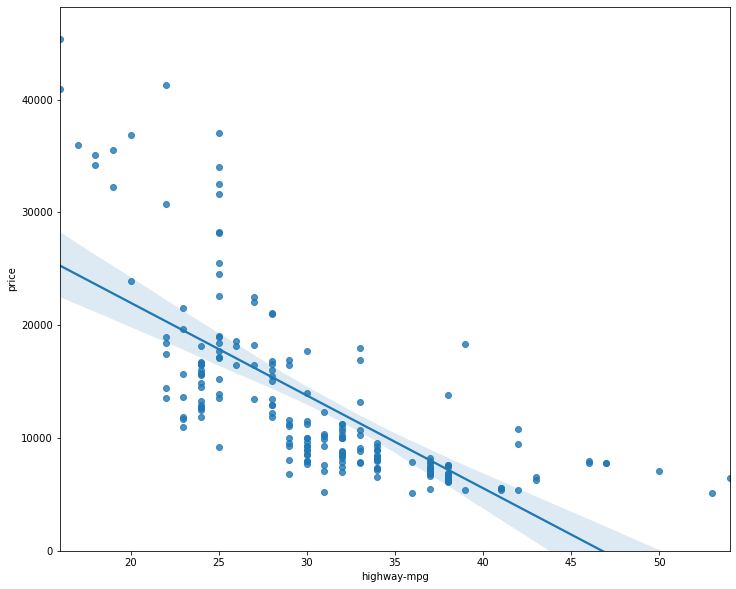

In [197]:
# Let's visualize highway-mpg as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

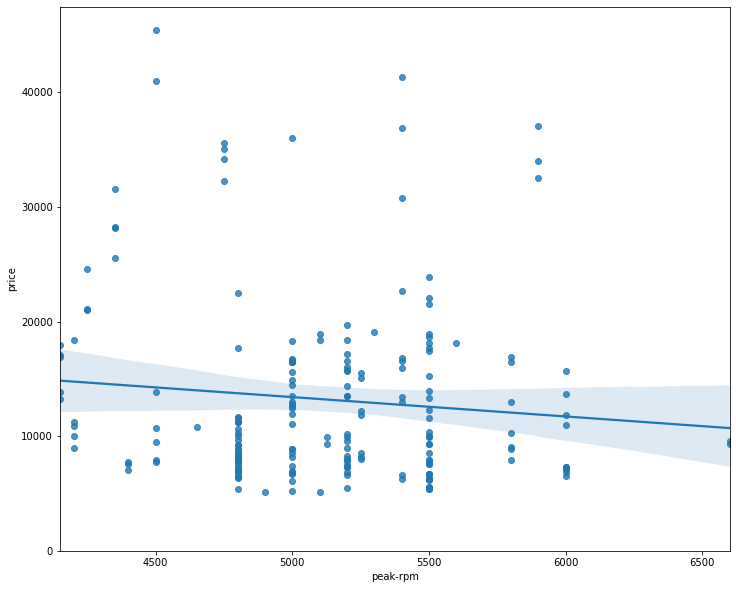

In [198]:
#Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [199]:
# Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method ".corr()" to verify your answer.

df[["peak-rpm","highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to   "peak-rpm" which is approximate     -0.101616. 

### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

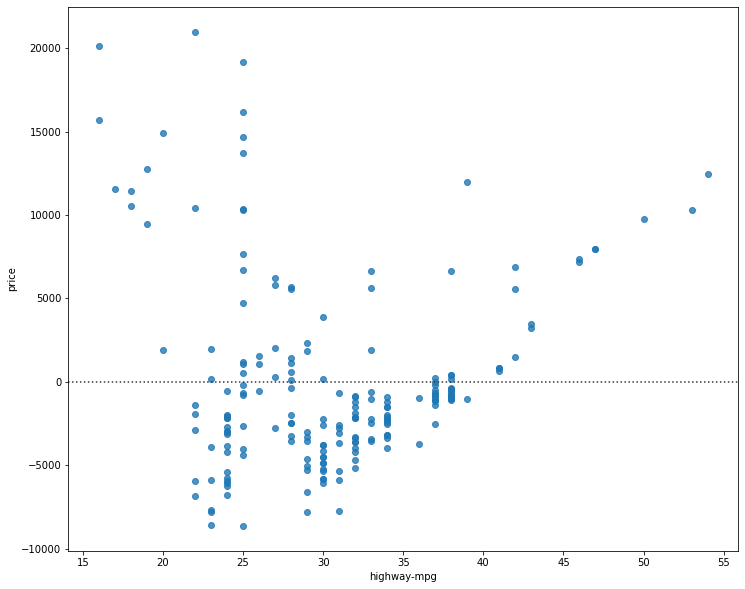

In [200]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression

 It a bit more complicated to visualize a model for Multiple Linear Regression because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [201]:
#First we make a prediction
Y_hat = lm.predict(Z)

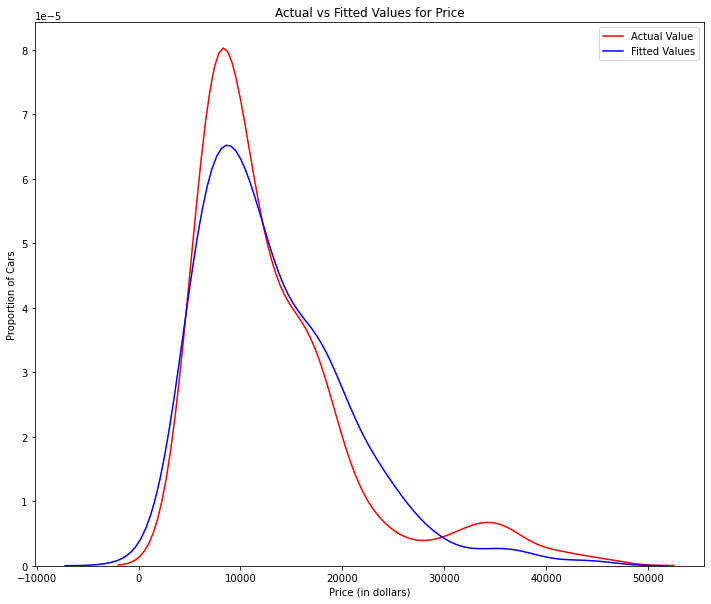

In [202]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Polynomial Regression and Pipelines

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [203]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [204]:
# lets get the variables
x = df['highway-mpg']
y = df['price']

In [205]:
# Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


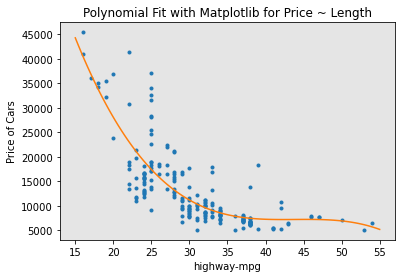

In [206]:
# Let's plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [207]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


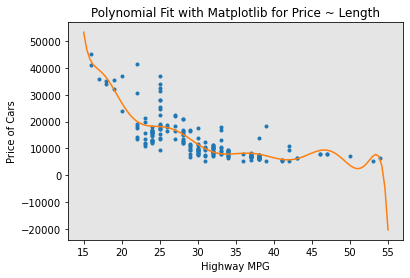

In [208]:
# calculate polynomial
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')


In [209]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [210]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [211]:
Z_pr=pr.fit_transform(Z)

In [212]:
# The original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [213]:
# after the transformation, there 201 samples and 15 features
Z_pr.shape

(201, 15)

#### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [215]:
# We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [216]:
# we input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [217]:
# We can normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [218]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [219]:
# pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

#### Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

1. R^2 / R-squared

2. Mean Squared Error (MSE)

### Model 1: Simple Linear Regression

Let's calculate the R^2

In [220]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that ~ 76.096% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

In [221]:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:1])


The output of the first four predicted value is:  [13728.4631336]


In [222]:
# lets import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results

In [223]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


### Model 2: Multiple Linear Regression

In [224]:
#Let's calculate the R^2

# fit the model 
lm.fit(Z, df['price'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~ 80.935 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

In [225]:
# we produce a prediction
Y_predict_multifit = lm.predict(Z)

In [226]:
# we compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

Let's calculate the R^2

let’s import the function r2_score from the module metrics as we are using a different function

In [227]:
from sklearn.metrics import r2_score

In [228]:
# We apply the function to get the value of r^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

### MSE

In [229]:
# We can also calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.42636125

## Part 5: Prediction and Decision Making

Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [230]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [231]:
#Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [232]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [233]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

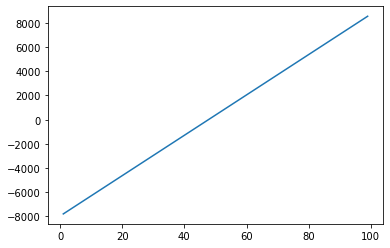

In [234]:
# we plot the data
plt.plot(new_input, yhat)
plt.show()

Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

Note:
    
- What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

- What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Let's take a look at the values for the different models.¶

#### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

- R-squared: 0.7609686443622008
- MSE: 1.5 x 10^7

#### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

- R-squared:  0.8093562806577457
- MSE: 1.2 x 10^7

#### Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

- R-squared: 0.6741946663906514

- MSE: 2.05 x 10^6

### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

- MSEThe MSE of SLR is 1.5 x 10^7 while MLR has an MSE of 1.2 x 10^7. The MSE of MLR is  smaller.
- R-squared: In this case, we can also see that there is a little difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR ~0.761 is smaller compared to the R-squared for the MLR ~0.809.

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#### Simple Linear Model (SLR) vs Polynomial Fit

- MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- R-squared: The R-squared for the Polyfit is Smaller than the R-squared for the SLR, so the Polynomial Fit also brought down the R-squared quite a bit.

Since the SLR resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the Polynomial Fit for predicting Price with Highway-mpg as a predictor variable.

#### Multiple Linear Regression (MLR) vs Polynomial Fit

- MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

## Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 29 variables in total, and we know that more than one of those variables are potential predictors of the final car price.